In [2]:
import numpy as np
import pandas as pd
from lda import LDA, LdaType
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Exercise 1 - Iris Fisher Dataset

In [3]:
data = pd.read_csv("./data/fisher.csv")

In [4]:
lda = LDA()
lda.fit(data=data, target_column_name='target')
conversion_data = lda.conversion(LdaType.Two)

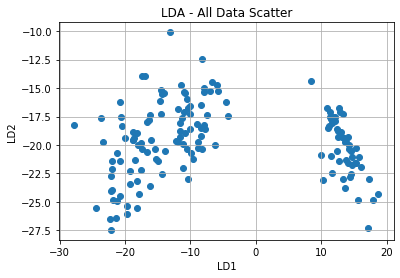

In [5]:
X = conversion_data.values[:, 0]
y = conversion_data.values[:, 1]
plt.scatter(X, y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA - All Data Scatter')
plt.grid()

Text(0.5, 1.0, 'LDA: Iris Dataset')

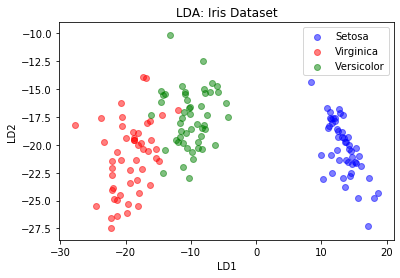

In [6]:
plt.scatter(x=X.real[data['target'].values == 0], y=y.real[data['target'].values == 0], color='blue', alpha=0.5, label='Setosa')
plt.scatter(x=X.real[data['target'].values == 1], y=y.real[data['target'].values == 1], color='red', alpha=0.5, label='Virginica')
plt.scatter(x=X.real[data['target'].values == 2], y=y.real[data['target'].values == 2], color='green', alpha=0.5, label='Versicolor')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.title('LDA: Iris Dataset')

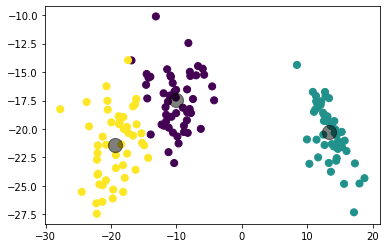

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(conversion_data)
y_kmeans = kmeans.predict(conversion_data)

plt.scatter(X, y, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Exercise 2 - PCA + LDA

In [8]:
data_drop = data.drop(columns=['target'])
target = data['target'].values

In [9]:
# One Principal Component 
pca = PCA(n_components=1)
pc1 = pca.fit_transform(data_drop.values)
df_pc1 = pd.DataFrame.from_dict({
                                'PC1': np.hstack(pc1),
                                'target': target
                                })

In [10]:
# Two Principal Component
pca = PCA(n_components=2)
pc2 = pca.fit_transform(data_drop.values)
df_pc2 = pd.DataFrame.from_dict({
                                'PC1': np.hstack(pc2[:, 0]),
                                'PC2': np.hstack(pc2[:, 1]),
                                'target': target
                                })

In [11]:
# Three Principal Component
pca = PCA(n_components=3)
pc3 = pca.fit_transform(data_drop.values)
df_pc3 = pd.DataFrame.from_dict({
                                'PC1': np.hstack(pc2[:, 0]), 
                                'PC2': np.hstack(pc2[:, 1]), 
                                'PC3': np.hstack(pc2[:, 1]), 
                                'target': np.hstack(target)
                                })

## Exercise 2 - PC1 + LDA

In [59]:
lda = LDA()
lda.fit(data=df_pc1, target_column_name='target')
conversion_data = lda.conversion(LdaType.One)

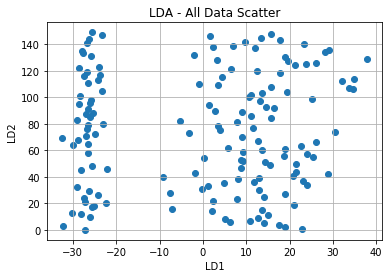

In [60]:
X = conversion_data
y = np.arange(len(conversion_data))
plt.scatter(X, y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA - All Data Scatter')
plt.grid()

C:\Users\Capati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  """Entry point for launching an IPython kernel.
C:\Users\Capati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  
C:\Users\Capati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'LDA: Iris Dataset')

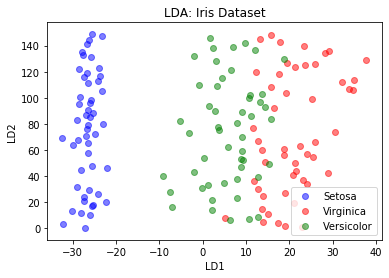

In [61]:
plt.scatter(x=X.real[data['target'].values == 0], y=y.real[data['target'].values == 0], color='blue', alpha=0.5, label='Setosa')
plt.scatter(x=X.real[data['target'].values == 1], y=y.real[data['target'].values == 1], color='red', alpha=0.5, label='Virginica')
plt.scatter(x=X.real[data['target'].values == 2], y=y.real[data['target'].values == 2], color='green', alpha=0.5, label='Versicolor')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.title('LDA: Iris Dataset')

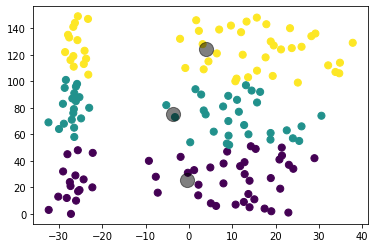

In [64]:
in_kmean = pd.DataFrame.from_dict({
                                'X': X.T,
                                'y': y
                                })
kmeans = KMeans(n_clusters=3)
kmeans.fit(in_kmean.values)
y_kmeans = kmeans.predict(in_kmean.values)
plt.scatter(in_kmean['X'].values, in_kmean['y'].values, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Exercise 2 - PC2 + LDA

In [47]:
lda = LDA()
lda.fit(data=df_pc2, target_column_name='target')
conversion_data = lda.conversion(LdaType.Two)

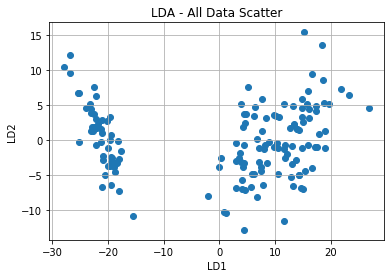

In [51]:
X = conversion_data.values[:, 0]
y = conversion_data.values[:, 1]
plt.scatter(X, y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA - All Data Scatter')
plt.grid()

Text(0.5, 1.0, 'LDA: Iris Dataset')

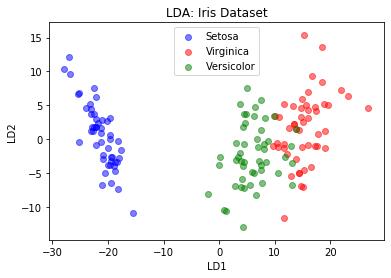

In [52]:
plt.scatter(x=X.real[data['target'].values == 0], y=y.real[data['target'].values == 0], color='blue', alpha=0.5, label='Setosa')
plt.scatter(x=X.real[data['target'].values == 1], y=y.real[data['target'].values == 1], color='red', alpha=0.5, label='Virginica')
plt.scatter(x=X.real[data['target'].values == 2], y=y.real[data['target'].values == 2], color='green', alpha=0.5, label='Versicolor')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.title('LDA: Iris Dataset')

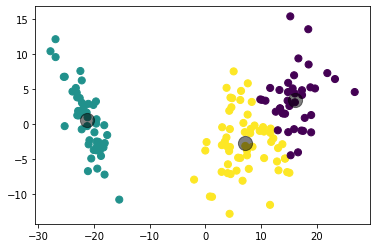

In [53]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(conversion_data)
y_kmeans = kmeans.predict(conversion_data)

plt.scatter(X, y, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Exercise 2 - PC3 + LDA

In [54]:
lda = LDA()
lda.fit(data=df_pc3, target_column_name='target')
conversion_data = lda.conversion(LdaType.Two)

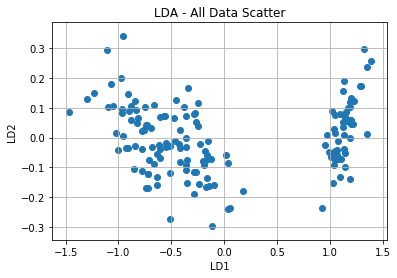

In [55]:
X = conversion_data.values[:, 0]
y = conversion_data.values[:, 1]
plt.scatter(X, y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA - All Data Scatter')
plt.grid()

Text(0.5, 1.0, 'LDA: Iris Dataset')

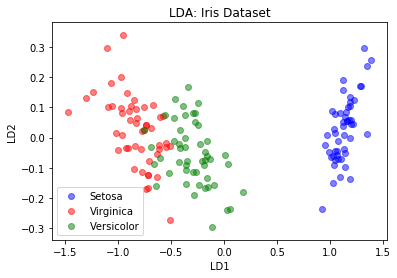

In [56]:
plt.scatter(x=X.real[data['target'].values == 0], y=y.real[data['target'].values == 0], color='blue', alpha=0.5, label='Setosa')
plt.scatter(x=X.real[data['target'].values == 1], y=y.real[data['target'].values == 1], color='red', alpha=0.5, label='Virginica')
plt.scatter(x=X.real[data['target'].values == 2], y=y.real[data['target'].values == 2], color='green', alpha=0.5, label='Versicolor')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.title('LDA: Iris Dataset')

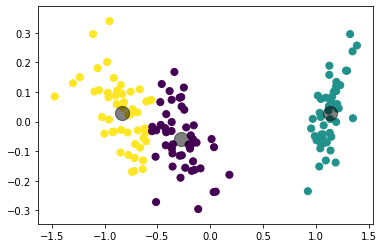

In [57]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(conversion_data)
y_kmeans = kmeans.predict(conversion_data)

plt.scatter(X, y, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);